# Single Events

P(A) = $\frac{\text{ number of ways A can occur}}{\text{size of sample space}}$

In [ ]:
# number of times event A occurs
A = 457

# total number of events
T = 1458

PA = 457/1458 # P(A)
print(PA)

0.31344307270233196


# Law of Large Numbers Example

* Pick a random number between 1 and 10 and find the average.

* Pick two random numbers between 1 and 10 and find their average.

* Pick three random numbers between 1 and 10 and find their average.

* Pick 10,000 random numbers between 1 and 10 and find their average.

* Graph the results.

      means
0  5.000000
1  6.500000
2  7.333333
3  5.750000
4  4.200000


Text(0, 0.5, 'Average Of Sample')

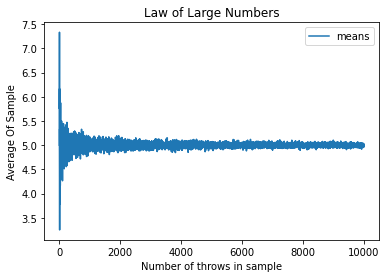

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
results = []
for n in range(1,10000):
    nums = np.random.randint(low=1,high=10, size=n) # choose n numbers between 1 and 10
    mean = nums.mean()                              # find the average of these numbers
    results.append(mean)                            # add the average to a running list
    
df = pd.DataFrame({ 'means' : results})
print(df.head()) # the averages in the beginning are all over the place!

df.plot(title='Law of Large Numbers')
plt.xlabel("Number of throws in sample")
plt.ylabel("Average Of Sample")

# Compound Events

P(A) $\cap$ P(B) = P(A and B)

P(A) $\cup$ P(B) = P(A or B)

P(A or B) = P(A) + P(B) - P(A and B)

In [ ]:
A = .25
B = .3
A_and_B = .2

# P(A or B)
print(round(A+B-A_and_B,2))

0.35


# Conditional Probability

P(A|B) - Probability of A given B

P(A|B) = P(A and B)/P(B)

In [ ]:
A_and_B/B

0.6666666666666667

# Mutual Exclusivity

* two events are mutually exclusive if they cannot occur at the same time
* P(A∩B) = P(A and B) = 0
* P(A  B) = P(A or B)= P(A) + P(B) − P(A ∩ B) = P(A) + P(B)

# Multiplication Rule

* P(A ∩ B) = P(A and B) = P(A) · P(B|A)

# Independence

* Two events are independent if one event does not affect the outcome of the other.

* P(B|A) = P(B) and P(A|B) = P(A)

* P(A ∩ B) = P(A) · P(B|A) = P(A) · P(B)

# Complementary Events

The complement of A is the opposite or negation of A. If A is an event, $\overline{A}$ represents the complement of A.

* P(A) = 1 - P($\overline{A}$)

# Bayes Theorem

P(A|B) = $\frac{P(A)*P(B|A)}{P(B)}$

* get from P(A|B) to P(B|A) (if you only have one)
* get P(A|B) if you already know P(A) (without knowing B)

In [ ]:
D = 0.05
N = 1-D
E_given_D = 0.6
E_given_N = 0.01
E = D*E_given_D+N*E_given_N
D_given_E = E_given_D*D/E
print(D_given_E)

0.7594936708860759


# Random Variable

A random variable uses real numerical values to describe a probabilistic event.

A probability mass function (PMF) describes a discrete random variable. P(X = x) = PMF

Expected Value = E(x) = $\mu x = \Sigma x_ip_i$

Variance = V(x) = $\sigma^2_x = \Sigma(x_i - \mu x)^2 p_i$

In [ ]:
# expected value of a random variable

import random
def random_variable_of_dice_roll():
    return random.randint(1, 7) # a range of (1,7) # includes 1, 2, 3, 4, 5, 6

# roll a die 100 times
trials = []
num_trials = 100
for trial in range(num_trials):
     trials.append(random_variable_of_dice_roll() )
print(sum(trials)/float(num_trials))

4.01


Text(0, 0.5, 'Average')

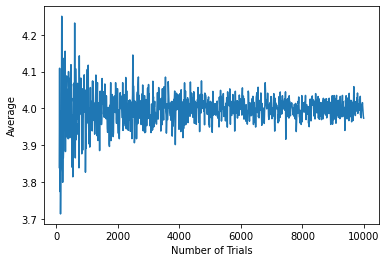

In [ ]:
num_trials = range(100,10000, 10)
avgs = []
for num_trial in num_trials:
    trials = []
    for trial in range(1,num_trial):
        trials.append(random_variable_of_dice_roll())
    avgs.append(sum(trials)/float(num_trial))

plt.plot(num_trials, avgs)
plt.xlabel('Number of Trials')
plt.ylabel("Average")

In [ ]:
# P(x=0), P(x=1), ... P(x=4)
x_0 = 0.02 
x_1 = 0.07
x_2 = 0.25
x_3 = 0.4
x_4 = 0.26

# Expected x
print(x_0*0+x_1*1+x_2*2+x_3*3+x_4*4)

2.8100000000000005


In [ ]:
# P(X >= 3) = 1 – P(X < 3)
round(1-x_2-x_1-x_0,2)

0.66

# Bernoulli trial

The bernoulli trial has two possible outcomes. Event one has probability of p, with the other p-1.

* P(A) = p
* P(B) = 1-p

In [ ]:
def BernoulliTrail(p=0.5):
    X = int(np.random.rand()<=p)
    return X

In [ ]:
# Probability of event 1 occuring is .7
# if X is less than or equal to p then event 1 occured, else event two occured

print(BernoulliTrail(0.7))

1


# Binomial Random Variable

A binomial random variable is a discrete random variable, X, that counts the number of successes in a binomial setting. The parameters are n = the number of trials and p = the chance of success of each trial.

The probability mass function (PMF) for a binomial random variable is as follows: $P(X=k)=p^k(1-p)^{n-k}$

Binomial Coefficient = $\frac{n!}{(n-k)!k!}$

Expected value = E(X) = np

Variations = V(X) = np(1 − p)

In [ ]:
def BT(n,p):
    X = (np.random.rand(n)<=p).sum()
    return X

In [ ]:
print(BT(100,0.4))

33


# Geometric Random Variable

A geometric random variable is a discrete random variable, X, that counts the number of trials needed to obtain one success. The parameters are p = the chance of success of each trial and (1 − p) = the chance of failure of each trial.

The formula for the PMF is as follows:
$P(X = x) = (1−p)[x−1]p$

In [ ]:
def GT(p):
    X = 1
    while True:
        if BernoulliTrail(p) == 1:
            return X
        else:
            X+=1

In [ ]:
p = 0.2
print(GT(p))

7


# Poison Distribution

Poisson distribution is a discrete probability distribution that counts the number of events that occur in a given interval of time.

If we let X = the number of events in a given interval, and the average number of events per interval is the λ number, then the probability of observing x events in a given interval is given by the following formula: $P(X=x) = \frac{e^{-\lambda}\lambda^x}{x!}$

* $\lambda$: mean number of successes
* $x$: number of successes

In [ ]:
from scipy.stats import  poisson
# Generage random variables
poisson.rvs(mu=3, size=10)

array([2, 3, 5, 3, 2, 4, 4, 7, 4, 4])

In [ ]:
# What is the probability of 5 events occuring given on average 3 events occur within a known timefram
poisson.pmf(k=5, mu=3)

0.10081881344492458

In [ ]:
# What is the probability of 4 or less events occuring given the average is 7 events occcuring
poisson.cdf(k=4, mu=7)

0.17299160788207146

In [ ]:
# What is the probability of 5 or more events occuring given the average is 7 events occcuring
1 - poisson.cdf(k=4, mu=7)

0.8270083921179285

# Continuous Random Variables

Continuous random variables can take on an infinite number of possible values.

Probability density function (PDF):
$P(a\le X \le b) = \int^b_a f(x) dx$

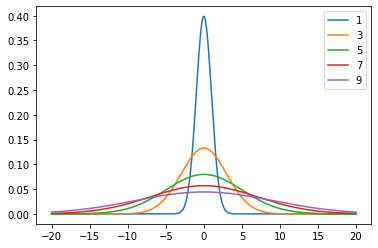

In [ ]:
# Normal distribution with various sigmas

x = np.linspace(-20,20,10000)
#muz = np.arange(-20,20,10)
mu = 0
sgmaz = np.arange(1,10,2)
for sgma in sgmaz:
    #sgma = 1
    fx = np.exp((-(x-mu)**2)/(2*(sgma**2)))/((2*np.pi*sgma**2)**0.5)
    plt.plot(x,fx,label=str(sgma))
plt.legend()

# Factorials: 𝑛!=𝑛×𝑛−1×𝑛−2×⋯×1

Variations with replacement: $\overline V(n,p) = n^p$
* $\overline V$ - variations with repetition
* $n$ - number of different elements available
* $p$ - number of elements arranged

Variations without replacement: $V(n,p) = \frac{n!}{(n-p)!}$
* $V$ - variations without repetition
* $n$ - number of different elements available
* $p$ - number of elements arranged



In [1]:
import math
math.factorial(7) / math.factorial(4)

210.0

# Combinations

Combinations represent the number of different possible ways to pick a number of elements. 

$C(n,p) = \frac{n!}{(n-p)!p!}$
 * $C$ - combinations
 * $n$ - total number of elements in the space
 * $p$ - number of elements to select


Combinations with repetition: $\overline C(n,p) = \frac{(n+p-1)!}{(n-1)!p!} $


Variations $V$ are concerned about order. 

In [16]:
# if there are 5 tasks to complete, then there are 5! different sequences to complete them

import math
math.factorial(5)

120

In [15]:
# there are 8 different selections available
# there are 5 different slots for these 8 selections

print('number of different combinations without replacement:', scipy.special.comb(8, 5))
print('number of different variations without replacement:', math.factorial(8)/math.factorial(3))

number of different combinations without replacement: 56.0
number of different variations without replacement: 6720.0


In [13]:
# there are 2 different selections available
# there are 7 selections with repeats

print('number of different variations:', 2**7)

number of different variations: 128


In [10]:
# there are 5 different selections available
# 2 are selected without repeats

print('number of different combinations:', scipy.special.comb(5, 2))

number of different combinations: 10.0


In [12]:
# there are 5 different selections available
# 2 are selected with repeats

print('number of different combinations:', math.factorial(6)/(math.factorial(2)*math.factorial(4)))

number of different combinations: 15.0
